<a href="https://colab.research.google.com/github/SpandanaKalakonda/Building_ML_Pipelines/blob/main/spanning_the_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tfx --quiet

In [4]:
import os
from tfx.orchestration.experimental.interactive.interactive_context import InteractiveContext
from tfx.components import CsvExampleGen
from tfx.proto import example_gen_pb2

In [5]:
# create the interactive context object
context = InteractiveContext()

If you have the datasets stored in the pattern of spans where the higher number represents the latest data. for example.

export-1 contains the data from export-0 and the newly created records since export-0 , similarly export-2 contains the data from export-1 and the newly created records since export-1.

The file structure is as follows:
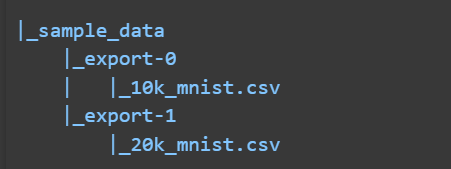

In [12]:
# Specifying the input data folder path
input_data = "/content/sample_data"

# Specifying the input configuration
input = example_gen_pb2.Input(
    splits=[
        # set the existing sub directory pattern
        example_gen_pb2.Input.Split(pattern='export-{SPAN}/*'),
    ]
)

In [13]:
#specifying the split output configuration
output = example_gen_pb2.Output(
    split_config=example_gen_pb2.SplitConfig(
        # Defining the preferred number of splits
        splits=[
            # Specifying the preferred slit ratios
            example_gen_pb2.SplitConfig.Split(name='train', hash_buckets=6),
            example_gen_pb2.SplitConfig.Split(name='eval', hash_buckets=2),
            example_gen_pb2.SplitConfig.Split(name='test', hash_buckets=2)
        ]
    )
)


In [14]:
# adding the input_config and output_config arguments
example_gen = CsvExampleGen(input_base=input_data, input_config=input, output_config=output)

In [15]:
# run the context inteactively
context.run(example_gen)

ExecutionResult(
    component_id: CsvExampleGen
    execution_id: 3
    outputs:
        examples: OutputChannel(artifact_type=Examples, producer_component_id=CsvExampleGen, output_key=examples, additional_properties={}, additional_custom_properties={}, _input_trigger=None)

If the data is already split and spanned.

The example structure is:

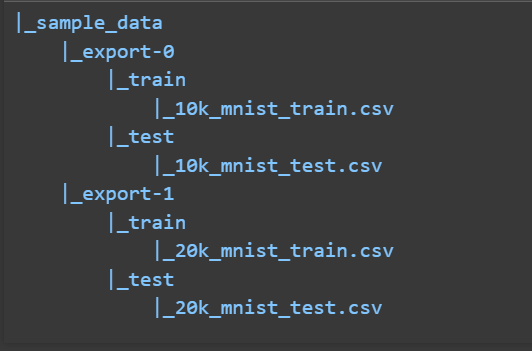

In [9]:
# Specifying the input data folder path
input_data = "/content/sample_data/data"

# Specifying the input configuration
input = example_gen_pb2.Input(
    splits=[
        # set the existing sub directory pattern
        example_gen_pb2.Input.Split(name='train', pattern='export-{SPAN}/train/*'),
        example_gen_pb2.Input.Split(name='test', pattern='export-{SPAN}/test/*'),
    ]
)

In [10]:
# adding the input_config argument
example_gen = CsvExampleGen(input_base=input_data, input_config=input)

In [11]:
# run the context inteactively
context.run(example_gen)

ExecutionResult(
    component_id: CsvExampleGen
    execution_id: 2
    outputs:
        examples: OutputChannel(artifact_type=Examples, producer_component_id=CsvExampleGen, output_key=examples, additional_properties={}, additional_custom_properties={}, _input_trigger=None)